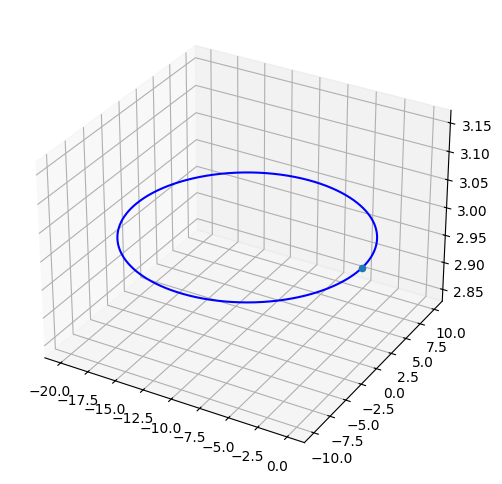

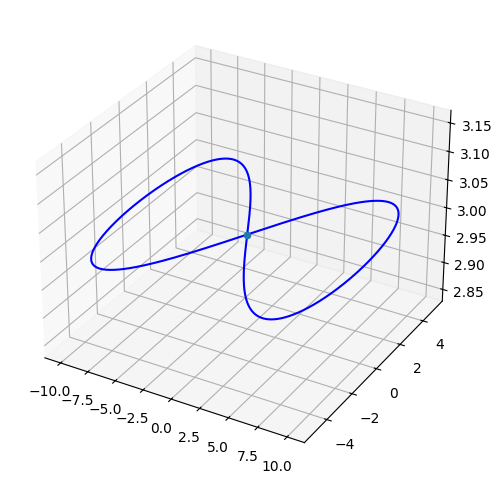

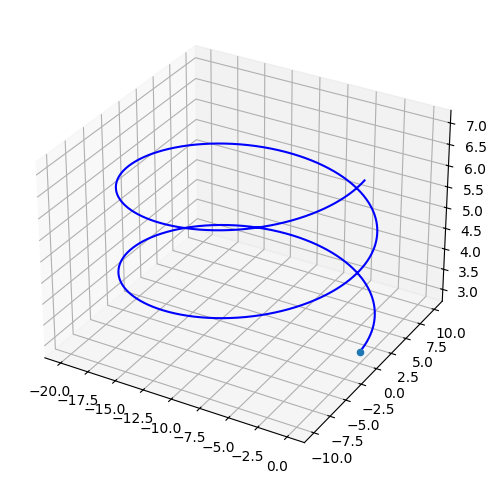

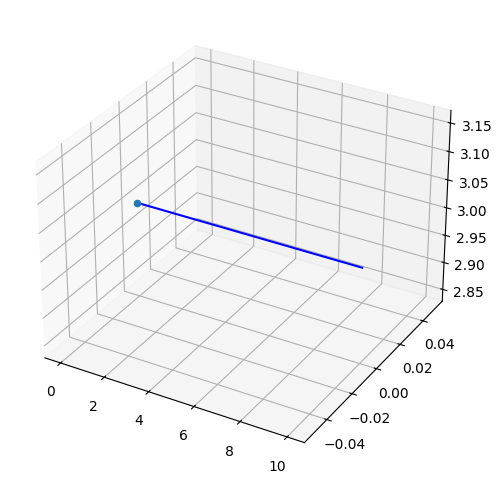

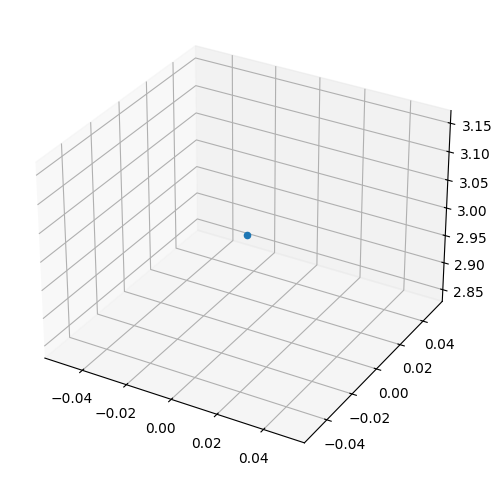

In [3]:
import math
import numpy as np
import os

def _plot(trajectory, starting_point):
    import matplotlib.pyplot as plt
    trajectory = np.array(trajectory)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], label='3D Line', color='b')
    ax.scatter(*starting_point)
    plt.show()
    
def _save(filename, trajectory):
    directory = os.path.join(os.path.pardir, 'config', 'traj')
    os.makedirs(directory, exist_ok=True)
    filepath = os.path.join(directory, filename)
    with open(filepath, 'w') as file:
        for state in trajectory:
            file.write(' '.join(map(str, state)) + '\n')

def generate_circle_trajectory(starting_point, radius, steps):
    theta = np.linspace(0, 2.0*np.pi, steps+1)

    xc, yc, zc = starting_point
    xc -= radius
    trajectory = []

    for t in theta:
        x = xc + radius * math.cos(t)
        y = yc + radius * math.sin(t)
        z = zc
        state = [x, y, z, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9033, 4.9033, 4.9033, 4.9033]
        trajectory.append(state)

    _plot(trajectory, starting_point)
    _save('circle.txt', trajectory)

def generate_figure8_trajectory(starting_point, radius, steps):
    theta = np.linspace(0, 2.0*np.pi, steps+1)

    x0, y0, z0 = starting_point
    trajectory = []

    for t in theta:
        x = x0 + radius * math.sin(t)
        y = y0 + radius * math.sin(2*t) / 2
        z = z0
        state = [x, y, z, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9033, 4.9033, 4.9033, 4.9033]
        trajectory.append(state)

    _plot(trajectory, starting_point)
    _save('figure_eight.txt', trajectory)

def generate_spiral_trajectory(starting_point, radius, steps, height):
    theta = np.linspace(0, 4.0*np.pi, steps+1)  # Two full circles

    xc, yc, zc = starting_point
    xc -= radius
    trajectory = []

    for t in theta:
        x = xc + radius * math.cos(t)
        y = yc + radius * math.sin(t)
        z = zc + (height / (2.0 * np.pi)) * t  # Linear increase in z
        state = [x, y, z, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9033, 4.9033, 4.9033, 4.9033]
        trajectory.append(state)

    _plot(trajectory, starting_point)
    _save('spiral.txt', trajectory)

def generate_straight_line_trajectory(starting_point, length, steps):
    x0, y0, z0 = starting_point
    trajectory = []

    for i in range(steps + 1):
        x = x0 + (length / steps) * i
        y = y0
        z = z0
        state = [x, y, z, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9033, 4.9033, 4.9033, 4.9033]
        trajectory.append(state)

    _plot(trajectory, starting_point)
    _save('straight_line.txt', trajectory)

def generate_static_trajectory(starting_point, steps):
    x0, y0, z0 = starting_point
    trajectory = []

    for _ in range(steps + 1):
        state = [x0, y0, z0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9033, 4.9033, 4.9033, 4.9033]
        trajectory.append(state)

    _plot(trajectory, starting_point)
    _save('static.txt', trajectory)

starting_point = (0, 0, 3)
radius = 10
steps = 10000
height = 2
length = 10

generate_circle_trajectory(starting_point, radius, steps)
generate_figure8_trajectory(starting_point, radius, steps)
generate_spiral_trajectory(starting_point, radius, steps, height)
generate_straight_line_trajectory(starting_point, length, steps)
generate_static_trajectory(starting_point, steps)
